In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10 ),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 22}
pylab.rcParams.update(params)
#Define Computer
Malphigui=1
if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Double_source'
    directory_article_figures='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Updated_BCs_2/Code/'
    directory_script='/home/pdavid/Bureau/Code/Updated_BCs_2/Figures_and_Tests/Double_source'
    
    
os.chdir(directory)
csv_directory=directory_script+'/csv_outputs'
from Testing import extract_COMSOL_data, save_csv

COMSOL_both_sources=directory_script + '/COMSOL_output/both_sources'
COMSOL_source_sink=directory_script + '/COMSOL_output/source_sink'


alpha,L=np.squeeze(np.array(pd.read_csv(csv_directory + '/alpha_L.csv').to_numpy()).astype(int))
array_of_dist=np.squeeze(np.array(pd.read_csv(csv_directory + '/array_of_dist.csv').to_numpy()).astype(int))*L/alpha

    Both sources, different radius, small neighbourhood

In [74]:
dir_sim=csv_directory + '/both_sources/small'

q_FEM_both_sources_small=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_both_sources+'/d={}'.format(int(d*alpha/L))
    #print(os.path.exists(COMSOL_both+'/d={}'.format(d)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_both_sources_small=np.concatenate((q_FEM_both_sources_small, [q_d]))
    

    
    

In [75]:
dir_sim=csv_directory + '/both_sources/big'

q_FEM_both_sources_big=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_both_sources+'/d={}'.format(int(d*alpha/L))
    #print(os.path.exists(COMSOL_both+'/d={}'.format(d*alpha/L)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_both_sources_big=np.concatenate((q_FEM_both_sources_big, [q_d]))

dir_sim=csv_directory + '/source_sink/small'

q_FEM_source_sink_small=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_source_sink+'/d={}'.format(d*alpha/L)
    #print(os.path.exists(COMSOL_source_sink+'/d={}'.format(d*alpha/L)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_source_sink_small=np.concatenate((q_FEM_source_sink_small, [q_d]))m 
    

dir_sim=csv_directory + '/source_sink/big'

q_FEM_source_sink_big=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_source_sink+'/d={}'.format(d*alpha/L)
    #print(os.path.exists(COMSOL_source_sink+'/d={}'.format(d*alpha/L)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_source_sink_big=np.concatenate((q_FEM_source_sink_big, [q_d]))

In [89]:
dir_sim=csv_directory + '/both_sources/small'

q_Multi=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FV=pd.read_csv(dir_sim + '/q_FV.csv').to_numpy()
q_FEM=pd.read_csv(dir_sim + '/q_FEM.csv').to_numpy()

err_q_Multi_small=np.abs(q_Multi-q_FEM)/q_FEM
err_q_FV=np.abs(q_FV-q_FEM)/q_FEM

save_csv(dir_sim + '/err_q_Multi.csv', ['small', 'big'], err_q_Multi.T)
save_csv(dir_sim + '/err_q_FV', ['small', 'big'], err_q_FV.T)

,small,big
0,0.751307,0.662652
1,0.617850,0.635748
2,0.564458,0.621314
3,0.501489,0.601328
4,0.461924,0.587003
5,0.433381,0.575763
6,0.393467,0.558707
7,0.366142,0.546108
8,0.138459,0.118269
9,0.131606,0.115317


Text(0, 0.5, 'relative flux error')

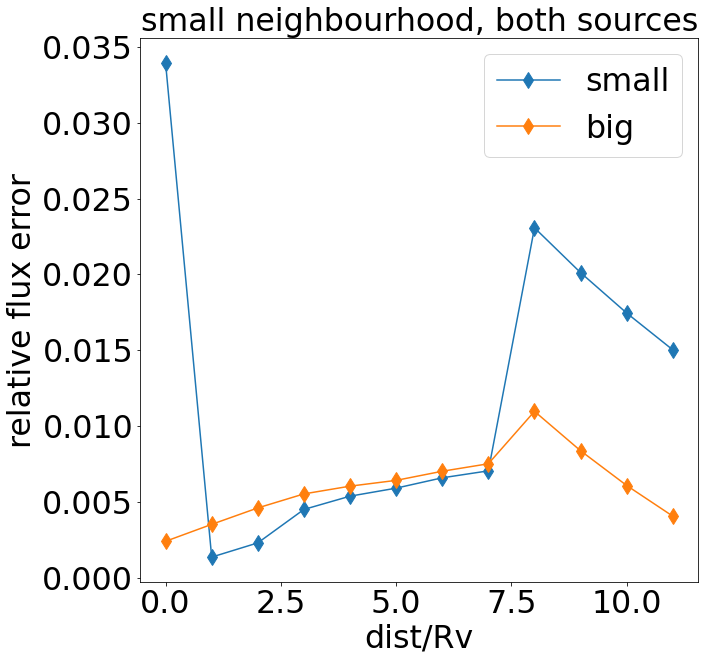

In [90]:
plt.plot(err_q_Multi_small[:,0], '-d',markersize=12,label='small')
plt.plot(err_q_Multi_small[:,1],'-d', markersize=12,label='big')


plt.title('small neighbourhood, both sources')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')

In [91]:
dir_sim=csv_directory + '/both_sources/big'

q_Multi=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FV=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FEM=pd.read_csv(dir_sim + '/q_FEM.csv').to_numpy()

err_q_Multi_big=np.abs(q_Multi-q_FEM)/q_FEM
err_q_FV=np.abs(q_FV-q_FEM)/q_FEM

save_csv(dir_sim + '/err_q_Multi.csv', ['small', 'big'], err_q_Multi.T)
save_csv(dir_sim + '/err_q_FV', ['small', 'big'], err_q_FV.T)

,small,big
0,0.036655,0.005028
1,0.004031,0.000826
2,0.000420,0.001863
3,0.001738,0.002712
4,0.002577,0.003154
5,0.003077,0.003465
6,0.003692,0.003892
7,0.004044,0.004135
8,0.004966,0.004880
9,0.004971,0.004850


Text(0, 0.5, 'relative flux error')

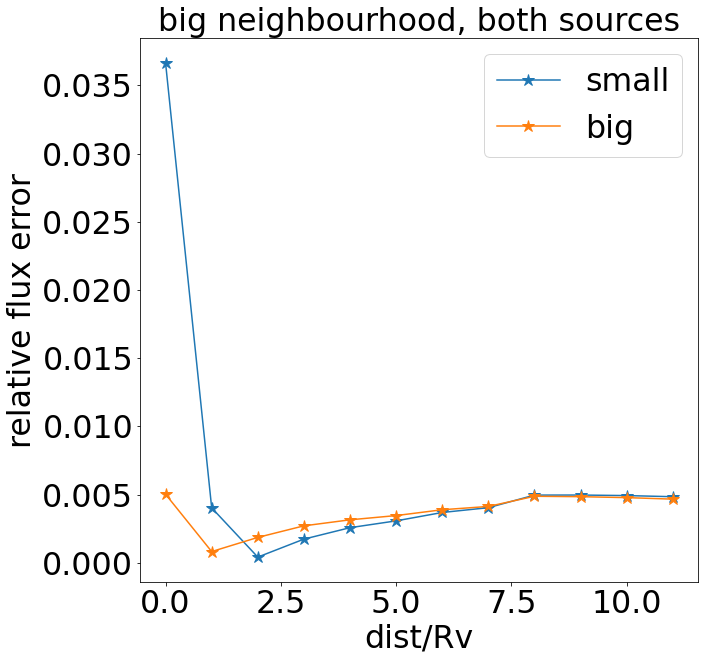

In [98]:
plt.plot(err_q_Multi_big[:,0], '-*', markersize=12,label='small')
plt.plot(err_q_Multi_big[:,1],'-*', markersize=12,label='big')
plt.title('big neighbourhood, both sources')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')

Multi simulations combined small and big neighbourhood

Text(0, 0.5, 'relative flux error')

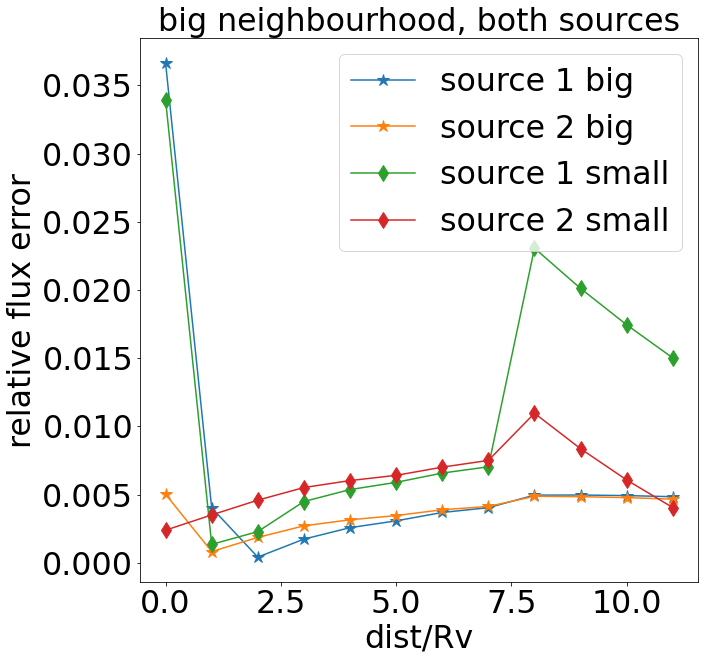

In [99]:
plt.plot(err_q_Multi_big[:,0], '-*', markersize=12,label='source 1 big')
plt.plot(err_q_Multi_big[:,1],'-*', markersize=12,label='source 2 big')
plt.plot(err_q_Multi_small[:,0], '-d',markersize=12,label='source 1 small')
plt.plot(err_q_Multi_small[:,1],'-d', markersize=12,label='source 2 small')

plt.title('big neighbourhood, both sources')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')

In [100]:
dir_sim=csv_directory + '/source_sink/small'

q_Multi=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FV=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FEM=pd.read_csv(dir_sim + '/q_FEM.csv').to_numpy()

err_q_Multi_small=np.abs((q_Multi-q_FEM)/q_FEM)
err_q_FV=np.abs((q_FV-q_FEM)/q_FEM)

save_csv(dir_sim + '/err_q_Multi.csv', ['small', 'big'], err_q_Multi.T)
save_csv(dir_sim + '/err_q_FV', ['small', 'big'], err_q_FV.T)

,small,big
0,0.025361,0.009483
1,0.011327,0.001968
2,0.007255,0.000243
3,0.005110,0.001736
4,0.004717,0.002329
5,0.004717,0.002694
6,0.004939,0.003223
7,0.005104,0.003681
8,0.021240,0.011578
9,0.018702,0.010234


Text(0, 0.5, 'relative flux error')

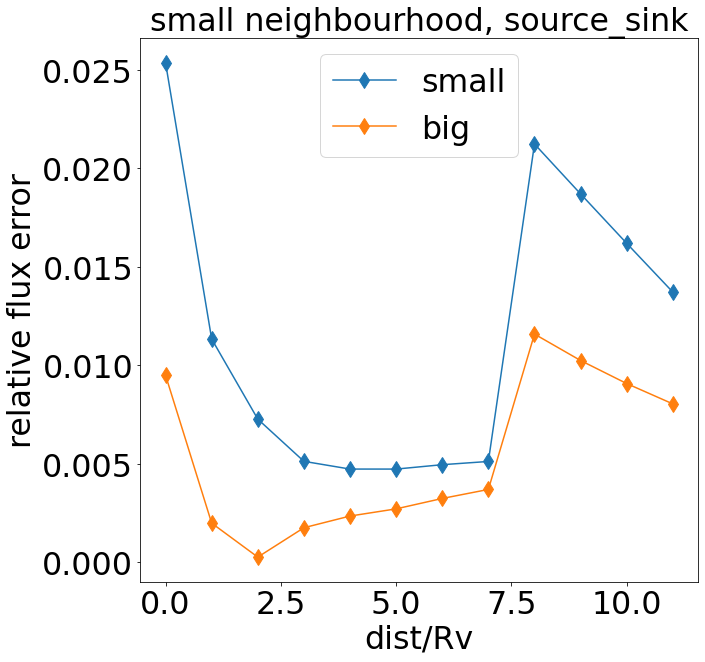

In [102]:
plt.plot(err_q_Multi[:,0], '-d',markersize=12,label='small')
plt.plot(err_q_Multi[:,1], '-d',markersize=12, label='big')
plt.title('small neighbourhood, source_sink')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')

In [82]:
dir_sim=csv_directory + '/source_sink/big'

q_Multi=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FV=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FEM=pd.read_csv(dir_sim + '/q_FEM.csv').to_numpy()

err_q_Multi=np.abs((q_Multi-q_FEM)/q_FEM)
err_q_FV=np.abs((q_FV-q_FEM)/q_FEM)

save_csv(dir_sim + '/err_q_Multi.csv', ['small', 'big'], err_q_Multi.T)
save_csv(dir_sim + '/err_q_FV', ['small', 'big'], err_q_FV.T)

,small,big
0,0.024139,0.010524
1,0.009950,0.003061
2,0.005765,0.000894
3,0.003468,0.000518
4,0.002989,0.001031
5,0.002948,0.001308
6,0.003192,0.001622
7,0.003480,0.001790
8,0.004615,0.002024
9,0.004667,0.002028


Text(0, 0.5, 'relative flux error')

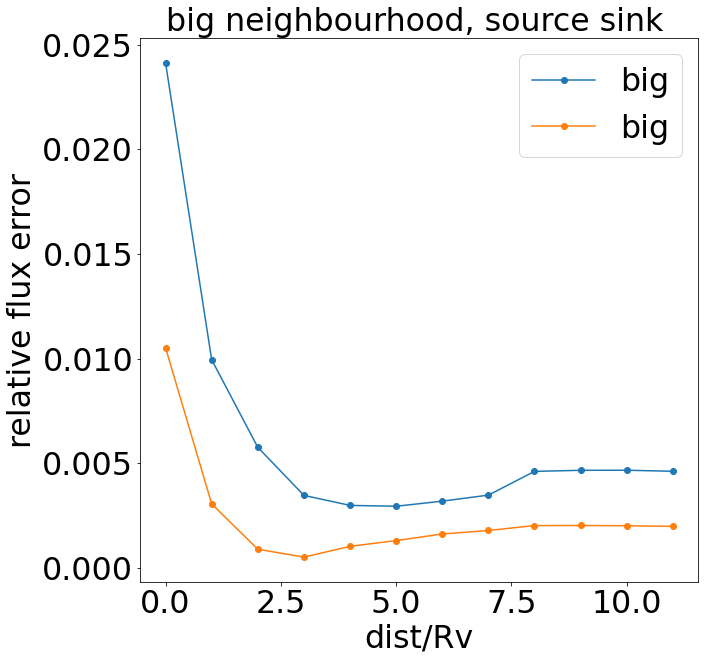

In [83]:
plt.plot(err_q_Multi[:,0], '-o',label='big')
plt.plot(err_q_Multi[:,1],'-o', label='big')
plt.title('big neighbourhood, source sink ')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')